In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Recency: Time before last purchase
# Frequency: Total number of purchases
# Monetary: High purchases

In [72]:
path = 'C:\\Users\\Ufuk Altan\\Desktop\\School\\Semester1\\MarketingAnalysis\\data\\'
df = pd.read_csv(path + 'Forddata.csv', delimiter = ';')
df.head()

,Date bought,Customer,Bought,Amount
0,15.08.1990,113,other,"27,29"
1,16.08.1990,64,other,"24,48"
2,18.08.1990,49,ford,"37,21"
3,18.08.1990,54,ford,"40,95"
4,18.08.1990,83,other,"9,02"


In [37]:
df.describe(include = 'all')

,Date bought,Customer,Bought,Amount
count,635,635.000000,635,635
unique,567,NaN,2,585
top,24.09.1990,NaN,other,"32,25"
freq,5,NaN,403,3
mean,NaN,59.795276,NaN,NaN
std,NaN,33.834385,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,31.500000,NaN,NaN
50%,NaN,60.000000,NaN,NaN
75%,NaN,89.000000,NaN,NaN


In [38]:
df.dtypes

Date bought    object
Customer        int64
Bought         object
Amount         object
dtype: object

In [115]:
dates = [datetime.strptime(date, '%d.%m.%Y') for date in df['Date bought']]
customers = [customer for customer in df['Customer']]
boughts = [bought for bought in df['Bought']]
amounts = [float(amount.replace(',', '.')) for amount in df['Amount']]

In [122]:
df = pd.DataFrame({ 'Customer': customers, 'Date': dates, 'Bought': boughts, 'Amount': amounts})

In [124]:
df

,Customer,Date,Bought,Amount
0,113,1990-08-15,other,27.29
1,64,1990-08-16,other,24.48
2,49,1990-08-18,ford,37.21
3,54,1990-08-18,ford,40.95
4,83,1990-08-18,other,9.02
...,...,...,...,...
630,100,2010-07-19,other,13.51
631,104,2010-09-29,other,11.94
632,13,2011-01-22,other,3.53
633,16,2011-06-07,ford,48.66


In [128]:
# We assume the present_day is the last date on the column
present_day = df['Date'].max()

In [164]:
rfm= df.groupby('Customer').agg({'Date': lambda date: (present_day - date.max()).days,
                                 'Customer': lambda num: len(num),
                                 'Amount': lambda price: price.sum()})

In [165]:
rfm.columns=['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer,,,
1,2021,7,128.46
2,0,7,173.34
3,4020,4,81.19
4,1051,7,152.33
5,4993,4,51.09


In [166]:
# Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

In [167]:
rfm.describe()

,Recency,Frequency,Monetary
count,117.000000,117.000000,117.000000
mean,2946.153846,5.427350,109.593932
std,1342.863542,1.147082,39.754361
min,0.000000,4.000000,41.010000
25%,2021.000000,4.000000,79.620000
50%,2985.000000,5.000000,104.820000
75%,4171.000000,6.000000,136.750000
max,5487.000000,7.000000,209.280000


In [169]:
rfm['Recency_Q'] = pd.qcut(rfm['Recency'], 3, ['1','2','3'])
rfm['Frequency_Q'] = pd.qcut(rfm['Frequency'], 3, ['3','2','1'])
rfm['Monetary_Q'] = pd.qcut(rfm['Monetary'], 3, ['3','2','1'])

In [172]:
rfm['RFM'] = rfm.Recency_Q.astype(str)+ rfm.Frequency_Q.astype(str) + rfm.Monetary_Q.astype(str)
rfm.head()

,Recency,Frequency,Monetary,Recency_Q,Frequency_Q,Monetary_Q,RFM
Customer,,,,,,,
1,2021,7,128.46,1,1,1,111
2,0,7,173.34,1,1,1,111
3,4020,4,81.19,3,3,3,333
4,1051,7,152.33,1,1,1,111
5,4993,4,51.09,3,3,3,333


In [181]:
rfm['RFM'] = rfm['RFM'].astype(int)
rfm.sort_values('RFM', ascending = False)

,Recency,Frequency,Monetary,Recency_Q,Frequency_Q,Monetary_Q,RFM
Customer,,,,,,,
117,4338,4,71.92,3,3,3,333
17,4171,4,49.77,3,3,3,333
66,4400,4,50.11,3,3,3,333
96,4504,4,75.19,3,3,3,333
48,4222,5,77.09,3,3,3,333
...,...,...,...,...,...,...,...
92,1335,7,164.38,1,1,1,111
91,1940,7,134.04,1,1,1,111
61,2095,7,198.35,1,1,1,111


In [183]:
df.query("Customer==113")

,Customer,Date,Bought,Amount
0,113,1990-08-15,other,27.29
177,113,1993-08-29,other,15.81
260,113,1996-01-31,other,25.54
368,113,1998-08-31,other,4.26
442,113,2000-08-20,ford,3.14
538,113,2003-12-24,other,4.89
583,113,2006-01-15,other,27.01


<IPython.core.display.Javascript object>


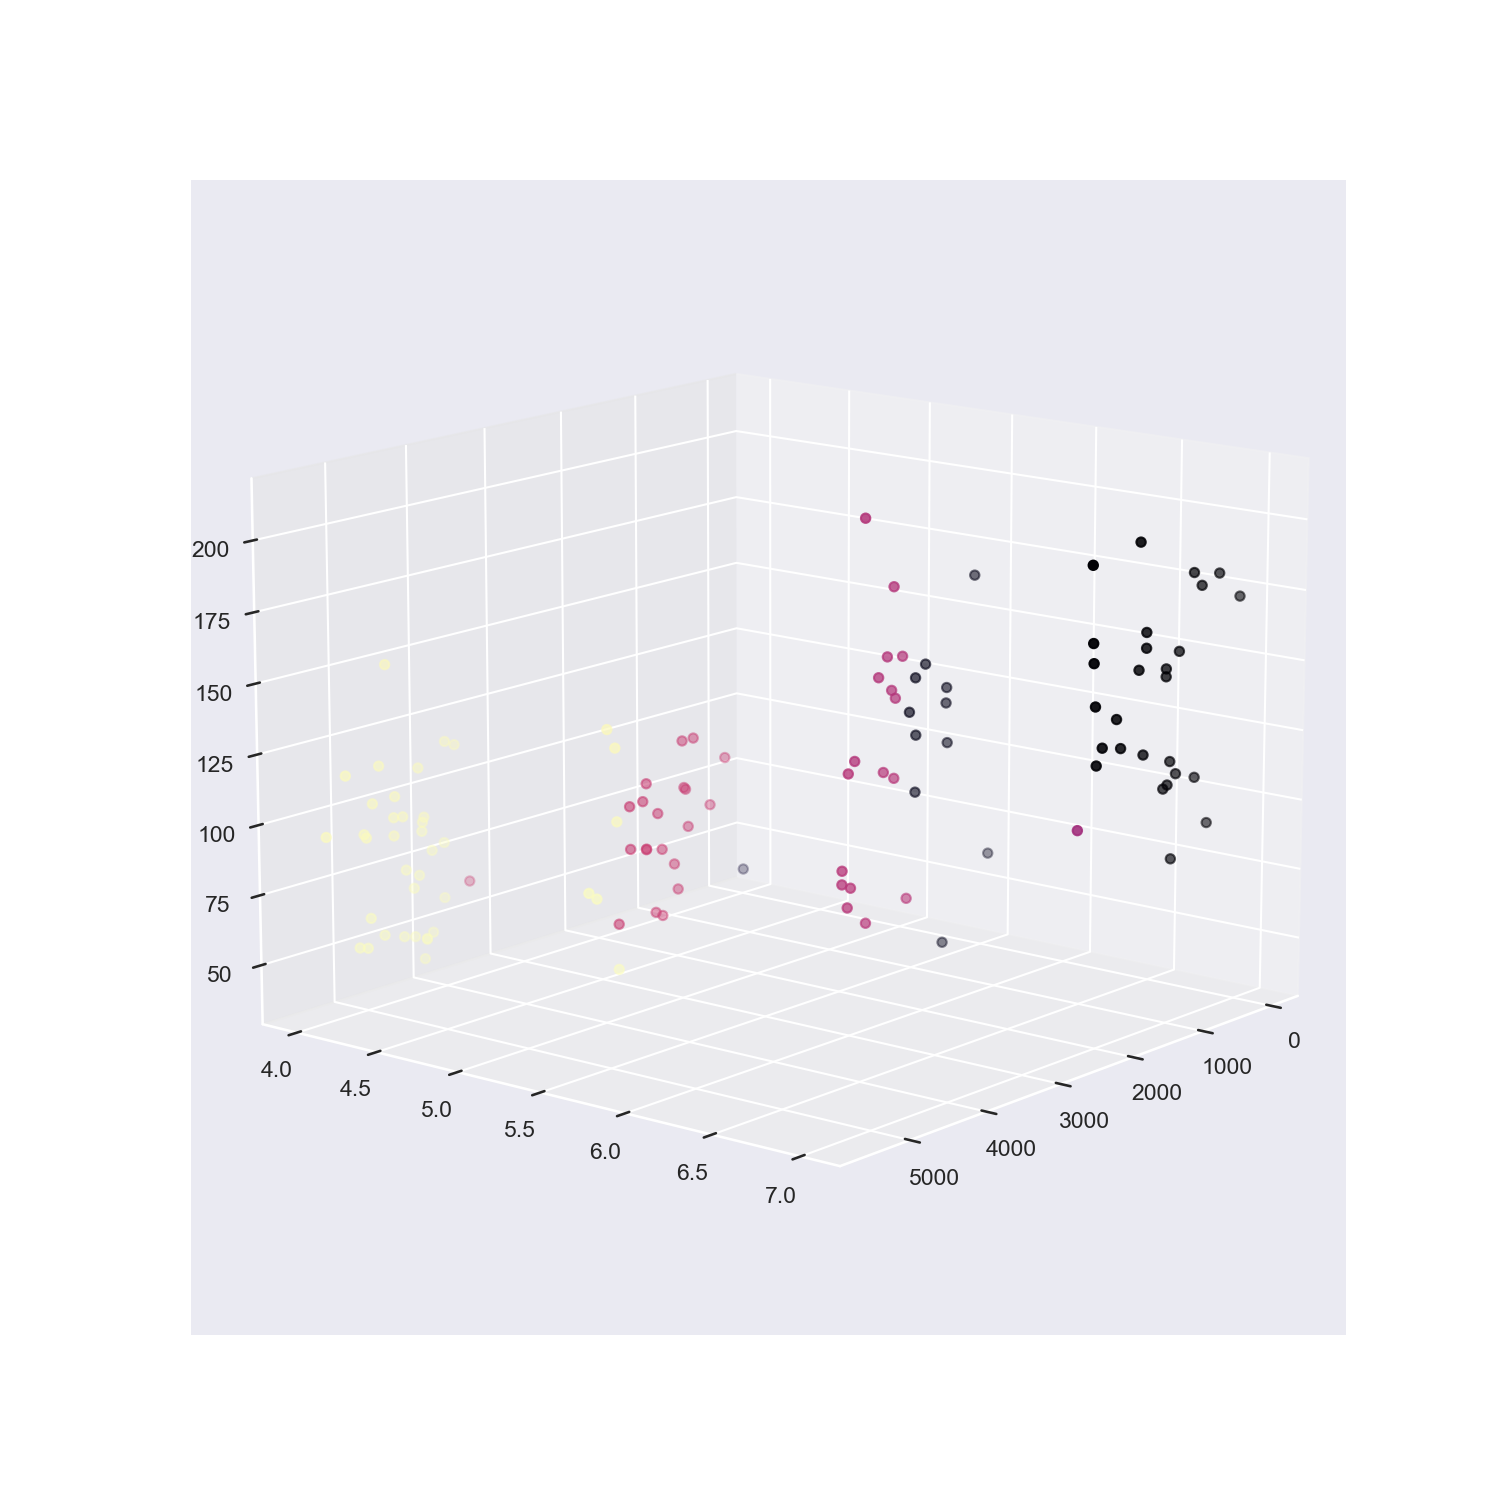

In [187]:
from mpl_toolkits import mplot3d
%matplotlib notebook
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c= rfm['RFM'],
             cmap = 'magma')